In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("./dataset/train.csv")

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train_g = df_train[['YearBuilt', 'SalePrice']].groupby(['YearBuilt', 'SalePrice'])

df_train_g = df_train_g[['YearBuilt', 'SalePrice']].head(len(df_train_g))

df_train_g = df_train_g.sort_values('YearBuilt')

df_train_g_mean = df_train_g.groupby(['YearBuilt']).mean()

df_train_g_count = df_train_g.groupby(['YearBuilt']).count()

df_train_g_count['SalePrice']

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: SalePrice, Length: 112, dtype: int64

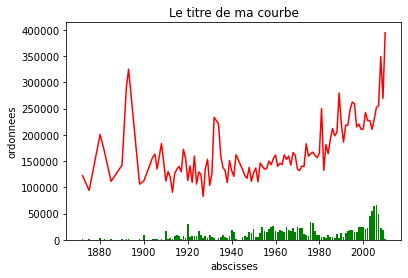

In [4]:
plt.plot(df_train_g_mean.index, df_train_g_mean['SalePrice'] , 'r');
#plt.plot(df_train_g_mean.index, df_train_g_count['SalePrice']*1000, '--b');
plt.bar(df_train_g_mean.index, df_train_g_count['SalePrice']*1000, color = 'green');
plt.title('Le titre de ma courbe')
plt.xlabel('abscisses')
plt.ylabel('ordonnees');

In [5]:
range(len(df_train_g_mean))

range(0, 112)

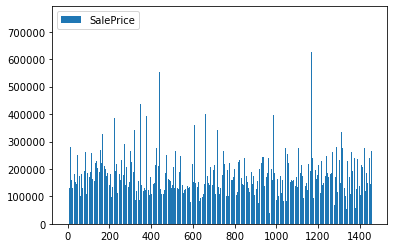

In [10]:
plt.bar(range(len(df_train)), df_train['SalePrice'], label = "SalePrice")
#plt.bar(df_train_g_mean.index, df_train.GarageArea, bottom = df_train.GrLivArea, label = "Produit2")
plt.legend();



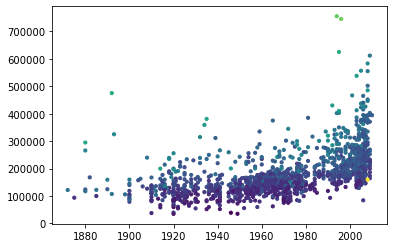

In [22]:
plt.scatter(df_train['YearBuilt'], df_train['SalePrice'], c = df_train['GrLivArea'], s = 10);

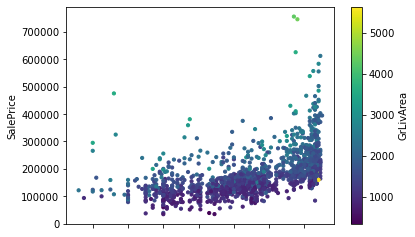

In [21]:
df_train.plot.scatter('YearBuilt', 'SalePrice', c = 'GrLivArea', s = 10, cmap = 'viridis');

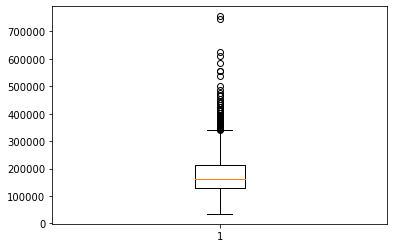

In [30]:
plt.boxplot(df_train['SalePrice']); # , df_train['YearBuilt'].fillna(df_train['YearBuilt'].mean(), inplace=True) 

In [72]:
YearBuilts = np.sort(df_train[df_train['YearBuilt'] > 1999]['YearBuilt'].unique())

In [82]:
YearBuilts

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

In [98]:
SalePrices = list()


for y in YearBuilts:
    #df_train[df_train['YearBuilt'] == y]['SalePrice']
    print(y)    
    SalePrices.append(df_train[df_train['YearBuilt'] == y]['SalePrice'] )
    


2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


In [99]:
print(len(YearBuilts), len(SalePrices))

11 11


In [103]:
SalePrices

[4       250000
 111     180000
 131     244000
 180     177000
 370     172400
 379     179000
 474     251000
 541     248000
 573     170000
 610     313000
 623     168500
 665     230500
 742     179000
 746     236000
 975     165000
 1108    181000
 1167    173000
 1203    213000
 1288    278000
 1354    235000
 1358    177500
 1365    216000
 1390    235000
 1433    186500
 Name: SalePrice, dtype: int64,
 2       223500
 133     220000
 147     222500
 189     286000
 258     231500
 302     205000
 391     215000
 539     272000
 612     261500
 641     226000
 782     187100
 827     189000
 928     236500
 1015    227000
 1037    287000
 1060    213500
 1198    178000
 1318    275000
 1373    466500
 1410    230000
 Name: SalePrice, dtype: int64,
 22      230000
 221     200000
 234     216500
 337     214000
 340     202900
 604     221000
 616     183200
 683     285000
 700     312500
 817     271000
 947     270000
 948     192500
 964     214900
 983     255900
 1033   

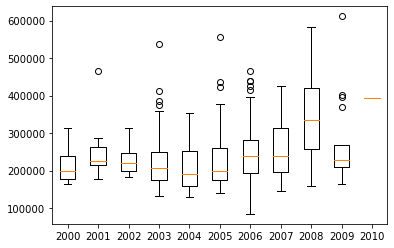

In [105]:
plt.boxplot(SalePrices)
plt.xticks(range(1, len(YearBuilts)+1),YearBuilts);


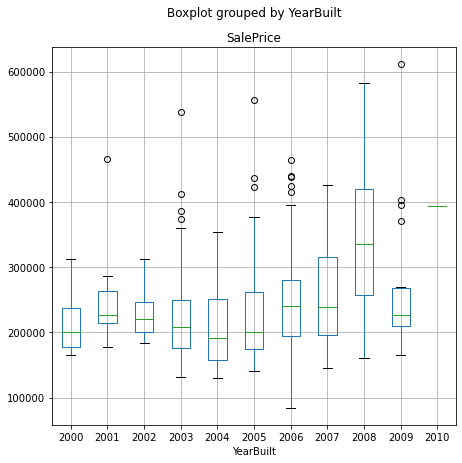

In [102]:
df_train[df_train['YearBuilt'] > 1999].boxplot(column= 'SalePrice', by='YearBuilt', figsize= (7,7));

In [120]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [122]:
df_train['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

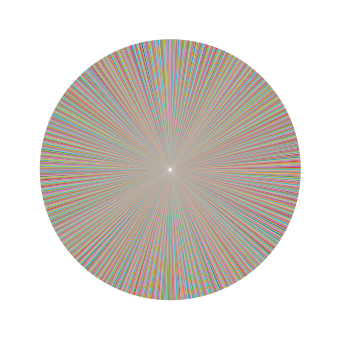

In [123]:
plt.figure(figsize = (6, 6))
plt.pie(df_train['GarageCars'])
plt.show()